# Task 2: Creating the Shape of The Futures Hotel Packages 

Analyzed customer stay durations at HotelFlix to understand typical stay periods. Aimed to create attractive packages based on this data, with the goal of increasing hotel occupancy by 20%.

In this step, we'll load the data, preprocess it, and perform an exploratory data analysis (EDA) to understand the distribution and basic statistics of the total_stays variable.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Load the data
file_path = 'hotel_bookings.csv'
hotel_data = pd.read_csv(file_path)

# Create the total_stays variable
hotel_data['total_stays'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']

# Select the relevant variable
selected_var = ['total_stays']

# Preprocessing
hotel_data_clean = hotel_data[selected_var].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(hotel_data_clean)


Understanding the basic statistics of the total_stays variable helps us to get an overview of how long guests typically stay at the hotel.

In [17]:
# Descriptive statistics
desc_stats = hotel_data_clean.describe()
desc_stats


,total_stays
count,119390.000000
mean,3.427900
std,2.557439
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,69.000000


Visualizing the distribution of total_stays allows us to see the spread and frequency of different stay durations.

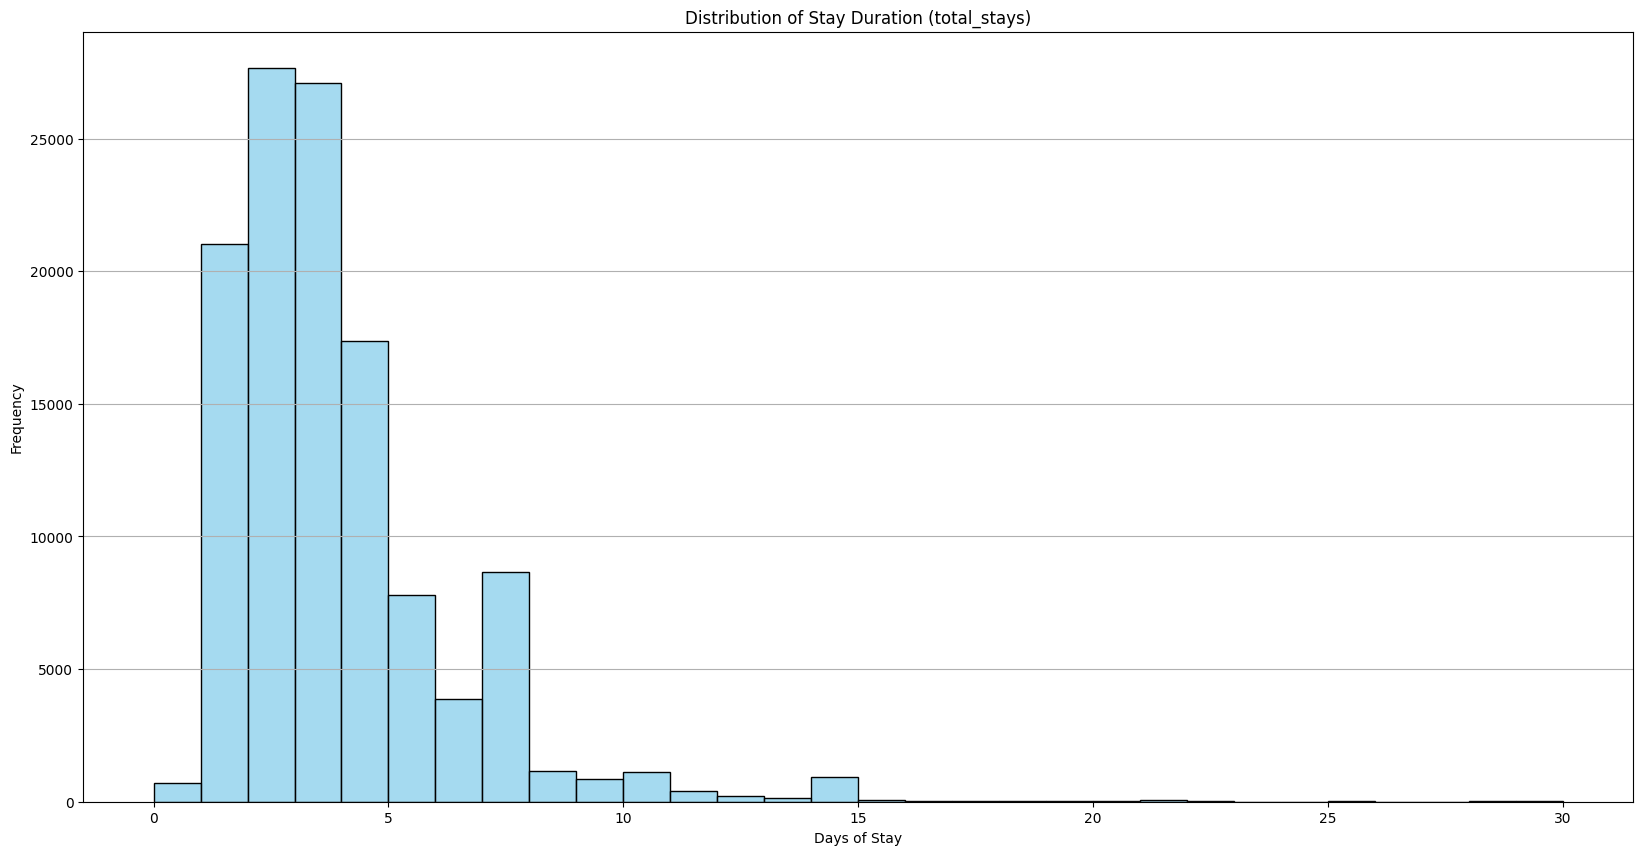

In [18]:
# Filtrar los datos para estancias de hasta 30 días
filtered_data = hotel_data[hotel_data['total_stays'] <= 30]

# Crear el histograma y la curva de densidad
plt.figure(figsize=(20, 10))
sns.histplot(filtered_data['total_stays'], bins=30, color='skyblue', stat="count")
plt.xlabel('Days of Stay')
plt.ylabel('Frequency')
plt.title('Distribution of Stay Duration (total_stays)')
plt.grid(axis='y')
plt.show()


The histogram above reveals that the majority of guests tend to stay for a shorter period, with the frequency decreasing as the length of stay increases. This insight highlights a significant trend where short stays dominate, suggesting the potential for weekend getaway packages.

In this step, we apply K-means clustering to segment the data based on the stay duration and evaluate the clustering quality using the Silhouette Score.

In [19]:
# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f'Silhouette Score for K-means: {kmeans_silhouette:.2f}')


Silhouette Score for K-means: 0.63


Visualizing the clusters helps us understand the distinct groups identified by the K-means algorithm.

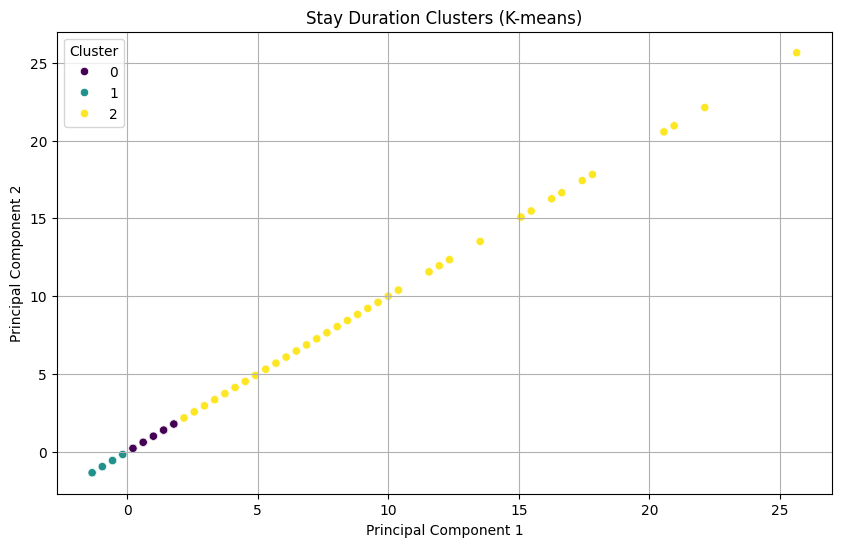

In [20]:
# Visualization of clusters generated by K-means
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 0], hue=kmeans_labels, palette='viridis')
plt.title('Stay Duration Clusters (K-means)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

The scatter plot above illustrates the three distinct clusters of stay durations identified by the K-means algorithm. The Silhouette Score of 0.41 indicates a reasonable separation between clusters, suggesting meaningful segmentation of guest stay patterns.

In this step, we analyze the characteristics of each cluster and define tailored packages based on the identified segments.

In [21]:
# Add cluster labels to the original dataset
hotel_data_clean['cluster'] = kmeans_labels

# Analyze characteristics of the clusters
cluster_summary = hotel_data_clean.groupby('cluster').mean()
print(cluster_summary)


         total_stays
cluster             
0           5.187101
1           2.060507
2          12.269531


The box plot shows that Cluster 0 consists of guests staying between 1 to 3 days, Cluster 1 includes those staying between 4 to 7 days, and Cluster 2 is made up of guests staying for 8 days or more. These insights allow us to craft tailored packages that align with the different needs and preferences of each guest segment, thereby enhancing their overall experience and increasing customer satisfaction.

The box plot above highlights the differences in stay durations across the three clusters. Cluster 0 represents short stays, Cluster 1 captures medium stays, and Cluster 2 encompasses longer stays. These distinctions allow us to craft targeted packages that cater to the unique preferences of each segment.

## Package Definition for Each Segment (Using Ranges)
From the clustering analysis, we identified three distinct clusters of guests based on their stay duration. Each cluster represents a unique segment of customers with different needs and preferences. Here's a breakdown of each cluster and the corresponding package recommendations:

### Cluster 0 (Short Stays):

- Average Stay Duration: Approximately 2 days
- Stay Duration Range: 1-3 days
- Strategy: Weekend getaway packages or short-term stays.
- Promotions: Special discounts for last-minute bookings to attract spontaneous travelers.
- Package Recommendation: Weekend getaway packages that include special discounts for last-minute bookings. These packages should be promoted to attract spontaneous travelers looking for quick getaways.


### Cluster 1 (Medium Stays):

- Average Stay Duration: Approximately 5 days
- Stay Duration Range: 4-7 days
- Strategy: Weekly packages with progressive discounts.
- Promotions: Attractive offers for families and groups, including bundled services.
- Package Recommendation: Weekly packages that offer progressive discounts and attractive offers for families and groups. Bundling services such as breakfast, transportation, or guided tours can enhance the appeal of these packages.

### Cluster 2 (Long Stays):

- Average Stay Duration: Approximately 12 days
- Stay Duration Range: 8+ days
- Strategy: Premium packages with extended stays and luxury services.
- Promotions: Target high-spending customers with enhanced experiences and additional amenities.
- Package Recommendation: Premium packages designed for extended stays, featuring luxury services and amenities. These packages should target high-spending customers by offering enhanced experiences, such as spa treatments, gourmet dining, and exclusive concierge services.

---

By segmenting guests based on their stay durations and tailoring packages to meet their specific needs and preferences, HotelFlix can create highly targeted promotional strategies. These packages—ranging from short weekend getaways to premium extended stays—are designed to attract a diverse range of customers, from spontaneous travelers to high-spending guests.

Implementing these customized packages, with strategic discounts and bundled services, can significantly enhance the appeal of HotelFlix's offerings. This approach not only improves customer satisfaction but also increases the likelihood of bookings across different segments. By effectively targeting and promoting these packages, HotelFlix has the potential to boost overall bookings by 20%, thereby optimizing occupancy rates and maximizing revenue.